# 6.5 - Unsupervised Machine Learning - Clustering

### This script contains the following points:

* 1 - Import Data & Libraries
* 2 - The Elbow Technique
* 3 - K-Means Clustering
    * I) "Age" vs. "Charges"
    * II) "Body Mass Index" vs. "Charges"
    * III) "Children" vs. "Charges"
    * IV) Descriptive Statistics - groupby.()    
* 4 - Exporting Data

## 1. Import Data & Libraries

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [195]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [196]:
# Define path

path = r'/Users/juanigalvalisi/Desktop/Data Analyst/Achievement 6/'

In [197]:
# Import .PKL

df_medical_costs = pd.read_pickle(os.path.join(path, 'medical_cost_categories.pkl'))

In [198]:
df_medical_costs.shape

(1337, 9)

In [199]:
df_medical_costs.head()

,Age,Sex,Body_mass_index,Children,Smoker,Region,Charges,Age_range,Cost_category
0,19,female,27.900,0,yes,southwest,16884.92400,Young,Middle cost
1,18,male,33.770,1,no,southeast,1725.55230,Young,Low cost
2,28,male,33.000,3,no,southeast,4449.46200,Young,Low cost
3,33,male,22.705,0,no,northwest,21984.47061,Adult,Middle cost
4,32,male,28.880,0,no,northwest,3866.85520,Adult,Low cost


In [200]:
# Create a new df with only numerical variables

df_medical_costs_num = df_medical_costs[['Age', 'Body_mass_index', 'Children', 'Charges']].copy()

In [201]:
df_medical_costs_num.head()

,Age,Body_mass_index,Children,Charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


---

## 2. The Elbow Technique

In [202]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [203]:
# Creates a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_medical_costs_num).score(df_medical_costs_num) for i in range(len(kmeans))] 

score

[-195939158682.99298,
 -47969960260.47198,
 -22948546893.928944,
 -12118189115.397726,
 -8534550402.923555,
 -6164408565.818463,
 -4434088695.697262,
 -3497824875.0013695,
 -2774685835.0144677]

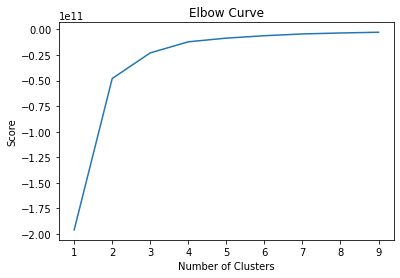

In [204]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from three to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

---

## 3. K-Means Clustering

In [205]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [206]:
# Fit the k-means object to the data.

kmeans.fit(df_medical_costs_num)

/Users/juanigalvalisi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [207]:
df_medical_costs_num['clusters'] = kmeans.fit_predict(df_medical_costs_num)

/Users/juanigalvalisi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [208]:
df_medical_costs_num.head()

,Age,Body_mass_index,Children,Charges,clusters
0,19,27.900,0,16884.92400,2
1,18,33.770,1,1725.55230,1
2,28,33.000,3,4449.46200,1
3,33,22.705,0,21984.47061,2
4,32,28.880,0,3866.85520,1


In [209]:
df_medical_costs_num['clusters'].value_counts()

1    887
2    288
0    162
Name: clusters, dtype: int64

### I) "Age" vs. "Charges"

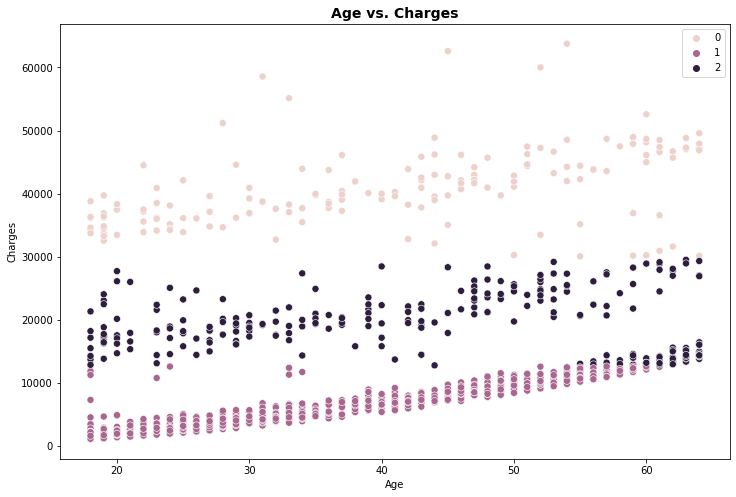

In [210]:
# Plot the clusters for the "Age" and "Charges" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_medical_costs_num['Age'], y = df_medical_costs_num['Charges'], hue = kmeans.labels_, s = 50)

ax.grid(False)
plt.title('Age vs. Charges', fontsize = 14, fontweight = 'bold')
plt.xlabel('Age') 
plt.ylabel('Charges') 
plt.show()

In [211]:
df_medical_costs_num['clusters'].value_counts()

1    887
2    288
0    162
Name: clusters, dtype: int64

### II) "Body Mass Index" vs. "Charges"

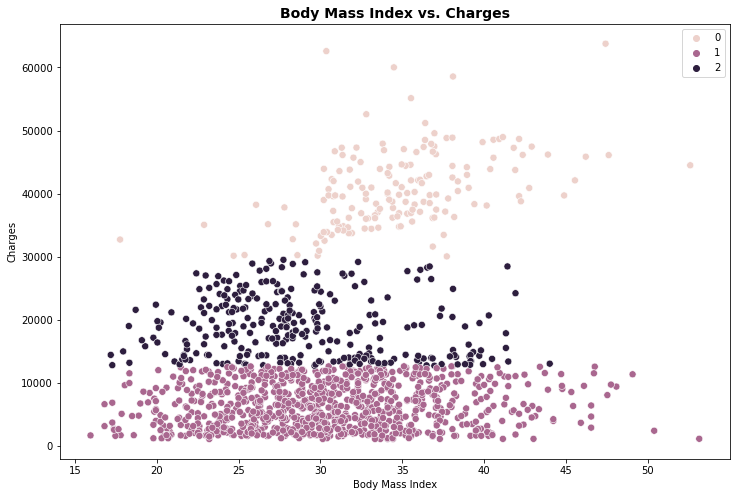

In [212]:
# Plot the clusters for the "Body Mass Index" and "Charges" variables.

plt.figure(figsize = (12,8))

ax = sns.scatterplot(x = df_medical_costs_num['Body_mass_index'], y = df_medical_costs_num['Charges'], hue = kmeans.labels_, s = 50) 

ax.grid(False) # This removes the grid from the background.
plt.title('Body Mass Index vs. Charges', fontsize = 14, fontweight = 'bold')
plt.xlabel('Body Mass Index') # Label x-axis.
plt.ylabel('Charges') # Label y-axis.
plt.show()

In [213]:
df_medical_costs_num['clusters'].value_counts()

1    887
2    288
0    162
Name: clusters, dtype: int64

### III) "Children" vs. "Charges"

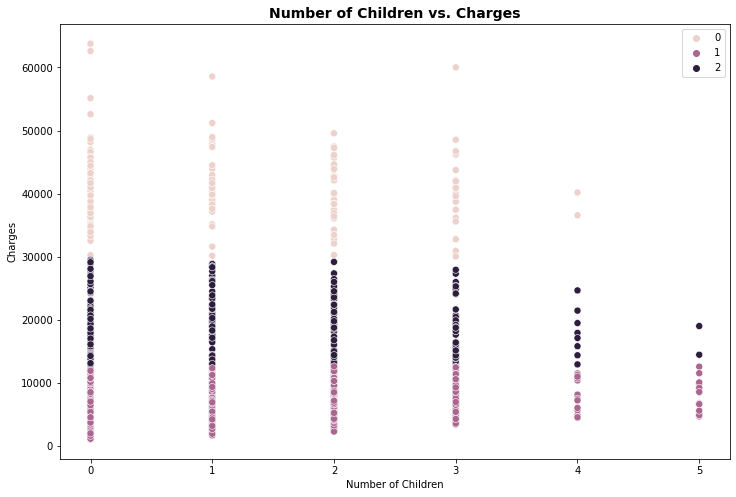

In [214]:
# Plot the clusters for the "Children" and "Charges" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_medical_costs_num['Children'], y = df_medical_costs_num['Charges'], hue = kmeans.labels_, s = 50)

ax.grid(False)
plt.title('Number of Children vs. Charges', fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of Children') 
plt.ylabel('Charges') 
plt.show()

In [215]:
df_medical_costs_num['clusters'].value_counts()

1    887
2    288
0    162
Name: clusters, dtype: int64

In [216]:
# Rename clusters

df_medical_costs_num.loc[df_medical_costs_num['clusters'] == 2, 'clusters'] = 'dark purple'
df_medical_costs_num.loc[df_medical_costs_num['clusters'] == 1, 'clusters'] = 'purple'
df_medical_costs_num.loc[df_medical_costs_num['clusters'] == 0, 'clusters'] = 'pink'

### Plot Analysis

**I) Age & Charges**: There are three lines that clearly divide the three groups related to the charges to be paid, although in all three groups there is an increasing tendency to pay more as the age of the person increases. Most data points are clustered in the group "0", those paying below USD 12,000 and up to 60 years of age. Groups "1" and "2" cover all possible age ranges, although group "1" pays expenses up to USD 30,000, and "2" has the most expensive expenses of all.

**II) Body Mass Index & Charges**: As with the age-related scatterplot, the three clusters are clearly divided in the charges to be paid, and most cases are under the "0" cluster. This cluster covers all ranges concerning body mass index, mainly from 22 to 35. Cluster "1" is concentrated within 12,000 to 30,000 concerning charges and from 22 to 35 related to BMI. Cluster "2" is focused on the higher strata concerning costs and is concentrated from 30 to 40.

**III) Children & Charges**: At a glance, having more dependents is irrelevant for calculating a possible charge increase. For example, in no case in cluster "2", the group with the most charges to pay, participates in all 5 dependents and barely in all 4. In turn, clusters "0" and "1" participate in all amounts of children. The most significant cases are concentrated in the 0 to 2 tenure.

### V) Descriptive Statistics - groupby.()

In [217]:
df_medical_costs_num.groupby('clusters').agg({'Age':['mean', 'median'], 
                         'Children':['mean', 'median'], 
                         'Body_mass_index':['mean', 'median']})

Age         Children        Body_mass_index        
                  mean median      mean median            mean  median
clusters                                                              
dark purple  44.975694   48.0  1.069444    1.0       28.876354  28.000
pink         40.376543   42.0  1.166667    1.0       34.845432  34.650
purple       37.143179   37.0  1.091319    1.0       30.479915  30.115

### Grouping Analysis

On the one hand, the grouping of information tells us that the Children category should not be considered a valuable variable since it has almost no weight when raising or lowering the charges. On the other hand, the pink cluster has the highest mean concerning the body mass index than the purple cluster, although the charges are higher in the latter. It would be good to relate this variable with other categories to see if variations better explain the relationship between body mass index and charges.

Considering the age of the people, the "dark purple" or "2" cluster, which has the highest positions, does not have the highest mean or median. Whoever holds the maximum values is the "purple" cluster, which has an average of 46 and a median of 51. This means that most adult people do not pay low or high insurance ranges, but medium ones.

It would be nice to get more information on hitherto unexplored categorical variables.

---

## 4. Exporting Data

In [218]:
# Export df_medical_costs_num as .pkl

df_medical_costs_num.to_pickle(os.path.join(path, 'medical_costs_clustering.pkl'))